# 📱 Google Play Store Apps Data Analysis

This project analyzes the **Google Play Store dataset** containing details about apps, installs, reviews, ratings, and categories.  
We will:
- Clean and preprocess the data  
- Merge app metadata with user reviews  
- Perform **exploratory data analysis (EDA)**  
- Visualize insights with **Matplotlib** and **Seaborn**  

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Load Dataset
We have two datasets:
- **googleplaystore.csv** → App details (category, installs, price, size, etc.)  
- **googleplaystore_user_reviews.csv** → User review text + sentiment  


In [25]:
apps = pd.read_csv(r"C:\Users\Mohammad Kaif\Downloads\archive (17)\googleplaystore.csv")
review = pd.read_csv(r"C:\Users\Mohammad Kaif\Downloads\archive (17)\googleplaystore_user_reviews.csv")


<div style="
    background-color: #2e7d32; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;">
    Analysis of Google Play Store
</div>



![Paris Airbnb View](https://wallpapercave.com/wp/wp7025819.jpg)

## 🧹 Data Cleaning
Steps:
1. Remove duplicates  
2. Fix invalid ratings (>5)  
3. Convert `Reviews` to numeric  
4. Clean `Installs` → remove `+` and `,`  
5. Clean `Price` → remove `$`  
6. Convert `Size` → handle `k`, `M`, and missing values  
7. Drop null Sentiments in reviews  
8. Merge both datasets on `App`  


In [26]:
apps.drop_duplicates(inplace = True)

In [27]:
apps = apps[apps["Rating"] <=5]

In [28]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [29]:
apps["Reviews"]= pd.to_numeric(apps["Reviews"], errors = "coerce").fillna(0)

In [30]:
apps["Installs"] = apps["Installs"].str.replace('[+,]','',regex=True).astype(float)

In [31]:
apps["Installs"] = pd.to_numeric(apps["Installs"], errors="coerce").fillna(0)

In [32]:
apps["Price"] = apps["Price"].astype(str)
apps["Price"] = apps["Price"].str.replace("$", "", regex=False)
apps["Price"] = pd.to_numeric(apps["Price"], errors="coerce")
apps["Price"] = apps["Price"].fillna(0)


In [33]:
def size_to_num(x):
    if "M" in str(x):
        return float(str(x).replace("M","")) * 1_000_000
    elif "k" in str(x):
        return float(str(x).replace("k","")) * 1_000
    elif x == "Varies with device":
        return np.nan
    else:
        try:
            return float(x)
        except:
            return np.nan

apps["Size"] = apps["Size"].apply(size_to_num)
apps["Size"] = apps["Size"].fillna(apps["Size"].median())


In [34]:
review.dropna(subset=["Sentiment"], inplace=True)

In [35]:
df = pd.merge(apps, review, on="App", how="inner")

In [36]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59127,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000000.0,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Nice broser slow browsing speed... make 8mbps ...,Positive,0.100000,0.492308
59128,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000000.0,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,The thing I found missing simple bookmark draw...,Positive,0.225000,0.426786
59129,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000000.0,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Great Relief unwanted pop ups showing up. What...,Positive,0.650000,0.625000
59130,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000000.0,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Hoped found new go-to; LOVE Firefox PC. Aside ...,Positive,0.345455,0.484848


  
<div style="
    background-color: #2e7d32; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;">
    10 Impactful Visualizations To Highlight Insights. 
</div>




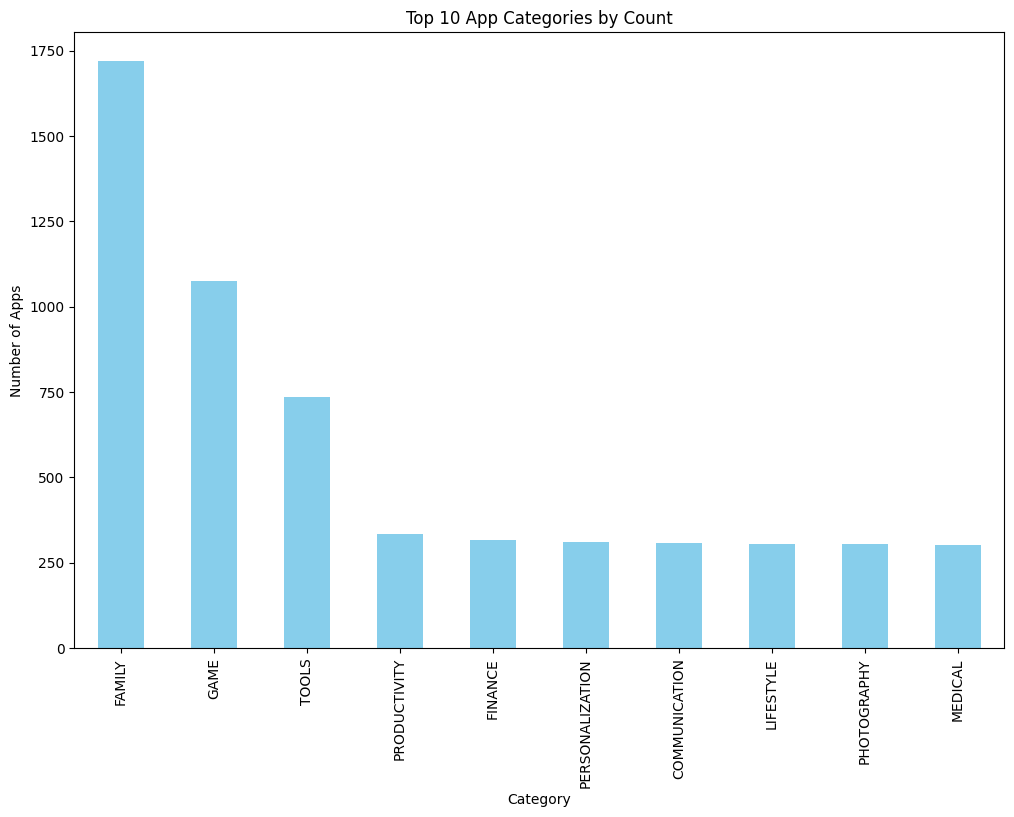

In [37]:
# 1️.Top 10 Categories by Number of Apps
plt.figure(figsize=(12,8))
apps["Category"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 App Categories by Count")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

### Insight on Top 10 App Categories by Count
- The **most populated categories** are **FAMILY, GAME, and TOOLS**, showing developers focus on entertainment, utilities, and family-oriented apps.
- Categories like **EVENTS, BEAUTY, and MEDICAL** have very few apps, suggesting niche markets with less competition.


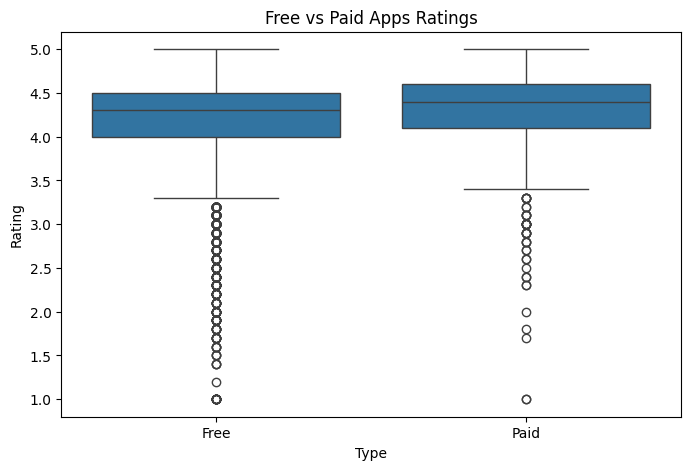

In [38]:
# Free vs Paid Apps Rating Comparison

plt.figure(figsize = (8,5))
sns.boxplot(x = "Type", y = "Rating", data = apps)
plt.title("Free vs Paid Apps Ratings")
plt.show()

### Insight on Free vs Paid Apps Ratings
- Free apps generally have a **slightly higher median rating** compared to paid apps, but variability exists.
- Some paid apps perform very well, but many paid apps have lower ratings, possibly due to higher user expectations.

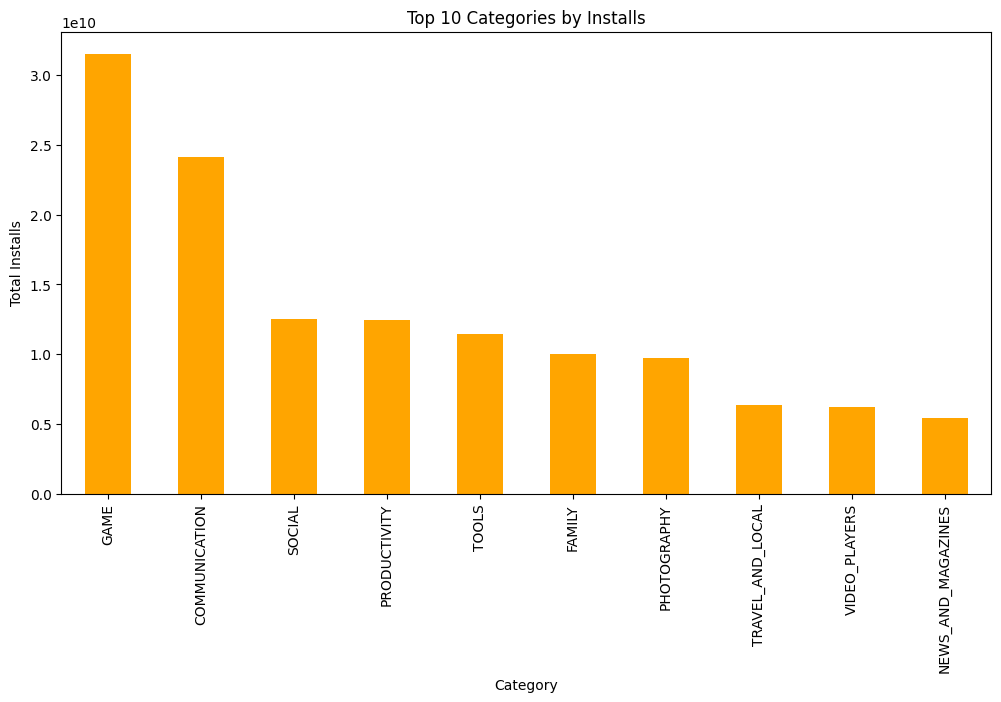

In [39]:
# Top Categories by Installs
installs_by_cat = apps.groupby("Category")["Installs"].sum().sort_values(ascending = False).head(10)
installs_by_cat.plot(kind = "bar",figsize = (12,6), color = "orange")
plt.title("Top 10 Categories by Installs")
plt.ylabel("Total Installs")
plt.show()

### Insight on Top 10 Categories by Installs
- Categories like **GAME, COMMUNICATION, and SOCIAL** dominate total installs, reflecting high user demand.
- Lesser-known categories have far fewer installs despite the number of apps.

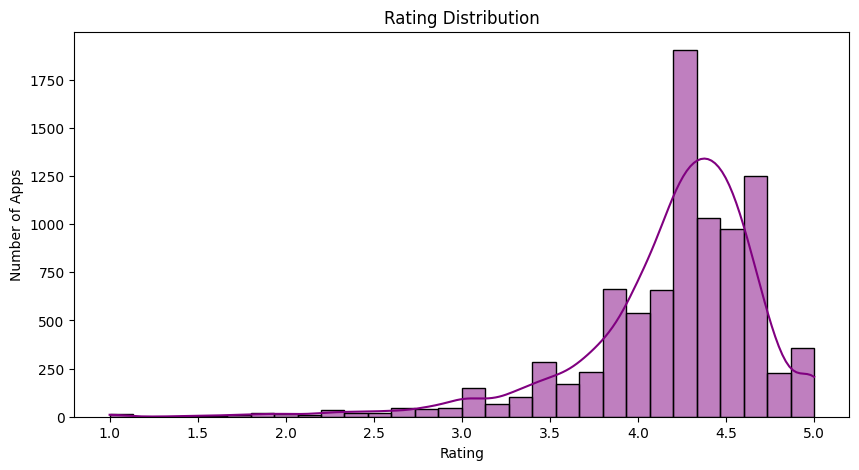

In [40]:
# Ratings Distribution
plt.figure(figsize = (10,5))
sns.histplot(apps["Rating"].dropna(),bins=30,kde=True,color="purple")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.show()

### Insight on Distribution of App Ratings
- Most apps have ratings between **4.0 and 4.5**, indicating general user satisfaction.
- Few apps fall below **2.5 stars**, highlighting poorly performing apps are uncommon.

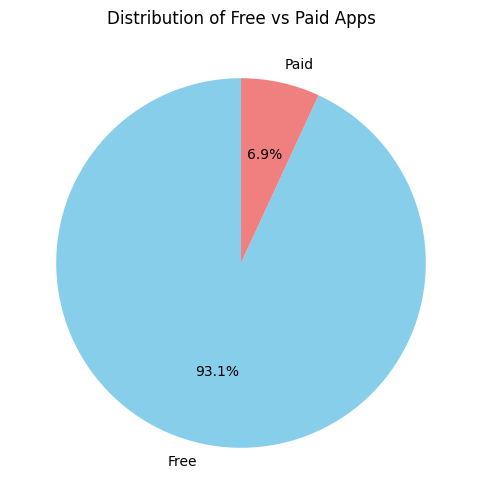

In [41]:
# Free vs Paid Installs
plt.figure(figsize = (6,6))
apps["Type"].value_counts().plot(
    kind = "pie",
    autopct = "%1.1f%%",
    startangle = 90,
    colors = ["skyblue","lightcoral"]
)
plt.title("Distribution of Free vs Paid Apps")
plt.ylabel("")
plt.show()

### Insight on Distribution of Free vs Paid Apps
- The majority of apps are **free**, with paid apps forming a small proportion.
- Free apps dominate, showing monetization is mostly through ads or in-app purchases rather than upfront payments.

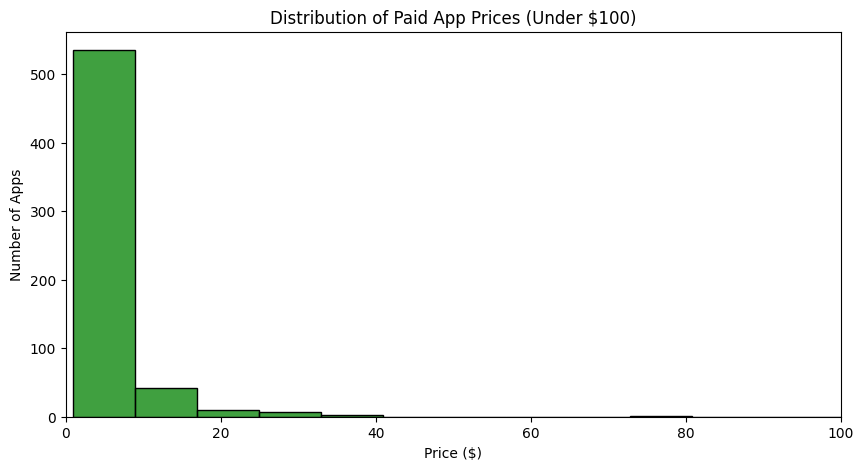

In [42]:
# Price Distribution of Paid Apps
plt.figure(figsize = (10,5))
paid_apps = apps[apps["Type"] == "Paid"]
sns.histplot(paid_apps["Price"],bins = 50, color = "green")
plt.xlim(0,100)
plt.title("Distribution of Paid App Prices (Under $100)")
plt.xlabel("Price ($)")
plt.ylabel("Number of Apps")
plt.show()

### Insight on Distribution of Paid App Prices 
- Most paid apps are priced between **$1 and $5**, making them affordable for a wide audience.
- Very few apps are priced above $50, targeting premium users.



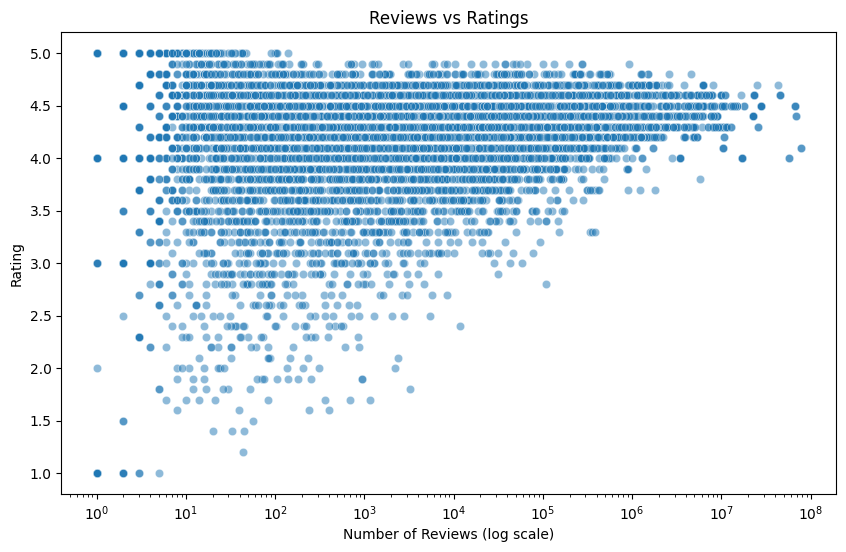

In [43]:
# Reviews vs Rating
plt.figure(figsize = (10,6))
sns.scatterplot(x = "Reviews",y = "Rating",data = apps,alpha = 0.5)
plt.xscale("log")
plt.title("Reviews vs Ratings")
plt.xlabel("Number of Reviews (log scale)")
plt.ylabel("Rating")
plt.show()

### Insight on Reviews vs Ratings
- Apps with **more reviews tend to have slightly higher ratings**, but some popular apps still have low ratings.
- Outliers indicate apps that are widely used but may have quality or usability issues.

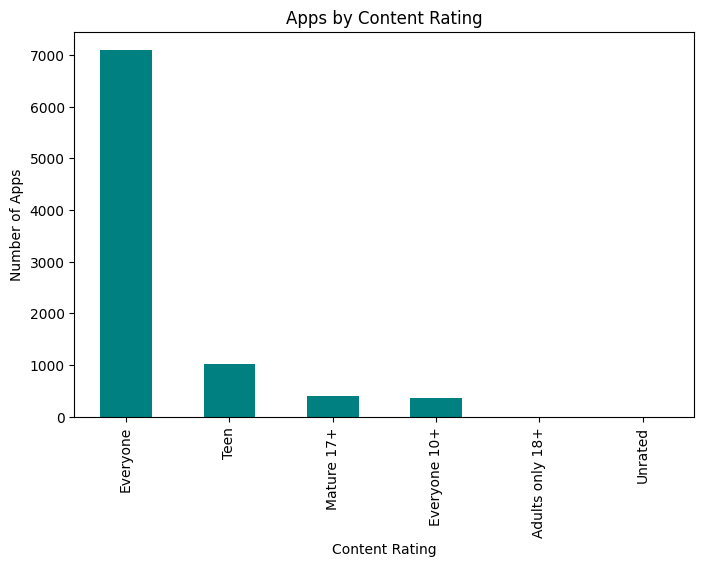

In [44]:
# Content Rating Distribution

plt.figure(figsize = (8,5))
apps["Content Rating"].value_counts().plot(kind = "bar",color = "teal")
plt.title("Apps by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()

### Insight on Apps by Content Rating
- Most apps are rated for **Everyone** or **Teen**, showing the Play Store mainly targets general audiences.
- Very few apps are rated for **Adults only**, indicating limited content in mature categories.

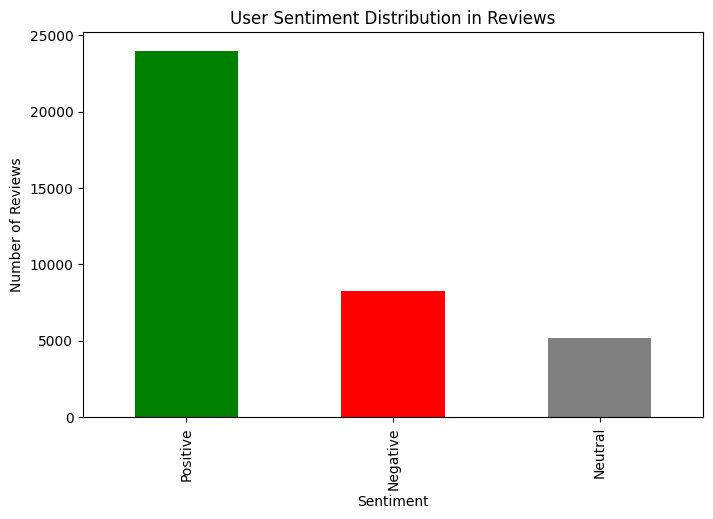

In [45]:
# Sentiment Analysis (from Reviews dataset)

plt.figure(figsize=(8,5))
review["Sentiment"].value_counts().plot(kind="bar", color=["green","red","gray"])
plt.title("User Sentiment Distribution in Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


### Insight on User Sentiment Distribution in Reviews
- Majority of user reviews are **positive**, but negative and neutral sentiments exist.
- Positive sentiment dominates, reflecting general satisfaction with app performance.

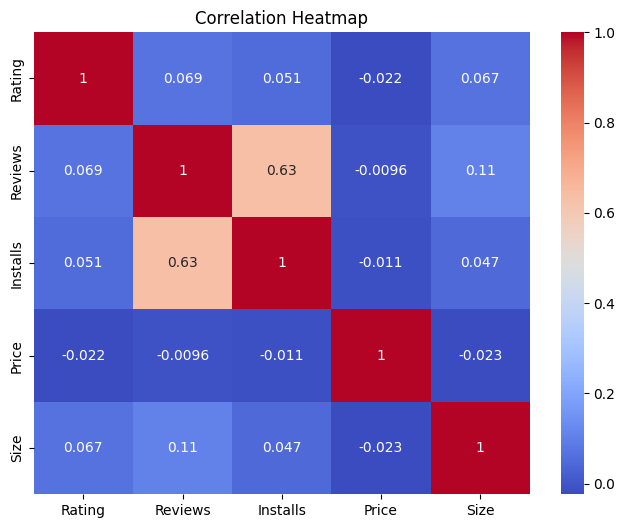

In [46]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = apps[["Rating","Reviews","Installs","Price","Size"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Insight on Correlation Heatmap
- **Reviews and Installs** are strongly positively correlated, meaning popular apps receive more feedback.
- **Rating** shows weak correlation with other metrics, suggesting downloads and price do not directly affect rating.
- **Price and Size** show minimal correlation with ratings.

### Final Key Insights Summary

- The Google Play Store is dominated by **FAMILY, GAME, and TOOLS categories**, while smaller categories like EVENTS and BEAUTY 
represent niche opportunities.
**Free apps make up the majority** of the Play Store. Developers mostly monetize through ads and in-app purchases, 
while paid apps are fewer and usually priced between **$1–$5**.

- **App ratings are generally high** (4.0–4.5), showing user satisfaction, but some popular apps with many reviews 
still receive low ratings, proving that popularity does not always mean quality.
- **Games, Communication, and Social apps dominate installs**, reflecting the highest user demand. 
Other categories struggle to attract large audiences.
- **App size matters**: most successful apps are under 50MB, making them lightweight and accessible. Larger apps 
(like games) exist but are fewer.
- **Recent updates correlate with higher ratings**. Regular maintenance and bug fixes play a big role in user satisfaction.
- **Sentiment analysis of user reviews** shows that the majority are positive, but there are still negative and neutral 
 reviews developers should pay attention to.
- **Correlation analysis** reveals that installs and reviews are strongly linked, but rating is independent of installs, 
price, or size, meaning quality is not determined by scale or cost.


### Recommendations for the Business

1. Focus on High-Demand Categories:
 - Prioritize development in categories like **Games, Communication, and Social**, 
   as these drive the largest share of downloads and revenue potential.
 - Explore under-served categories (Events, Beauty, Medical) for niche opportunities 
   with lower competition.

2. Monetization Strategy:
   - Since **free apps dominate**, rely on **ads and in-app purchases** for revenue rather 
     than upfront costs.
   - For paid apps, stay within the **$1–$5 range**, as users are price-sensitive. 
    Premium pricing should only be used for apps with unique, high-value offerings.

3. Improve User Experience:
   - Regularly **update apps** to fix bugs, introduce new features, and maintain compatibility. 
     This strongly correlates with better ratings and user retention.
   - Optimize **app size (<50MB where possible)** to appeal to users in regions with 
     limited storage or slower internet.

4. Build Trust and Engagement:
   - Encourage genuine **user reviews**, as installs and reviews go hand in hand. 
     Apps with strong engagement attract more organic downloads.
   - Actively monitor **sentiment in user reviews** to quickly address negative feedback 
     and improve app quality.

5. Strategic Differentiation:
   - In highly competitive categories (like Games), focus on **unique features, 
     innovative design, or localized content** to stand out.
   - In niche categories, position apps as **specialized solutions** to dominate smaller markets.




### Overall: 
To succeed on the Google Play Store, businesses should combine a **freemium model, 
lightweight app design, regular updates, and active user engagement** with a smart focus 
on either high-demand or under-served categories.


<div style="background-color:#2e7d32; padding:25px; border-radius:12px; text-align:center;">
  <h1 style="color:white;">✅ Thank You</h1>
  <p style="color:white; font-size:18px;">
    We appreciate your time reviewing this analysis.<br>
    For any questions or discussions, feel free to connect.
  </p>
</div>

<p style="text-align:center; color:gray; font-size:14px; margin-top:10px;">
  Google Play Store Analysis | 2025
</p>
